In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
sns.set_style("darkgrid")

## LOAD DATASET

In [26]:
df_tracks = pd.read_csv('D:/LOCAL DISK C/My Project/spotify-2023.csv', encoding = 'latin1')
df_tracks.head(576)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,Leave The Door Open,"Bruno Mars, Anderson .Paak, Silk Sonic",3,2021,3,5,14417,0,1115880852,237,...,148,F,Major,59,72,62,18,0,9,3
572,Knife Talk (with 21 Savage ft. Project Pat),"Drake, Project Pat, 21 Savage",3,2021,9,3,5199,0,594482982,45,...,146,F,Minor,85,22,37,13,0,7,30
573,Don't Be Shy,"Tiï¿½ï¿½sto, Kar",2,2021,8,1,6026,0,566954746,171,...,120,B,Minor,77,51,79,20,0,26,6
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


### Data Cleaning

In [9]:
pd.isnull(df_tracks).sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [10]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [11]:
df_tracks.shape

(953, 24)

In [12]:
df_tracks.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [13]:
len(df_tracks.columns)

24

In [14]:
df_tracks.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [42]:
# 1. Most Streamed Song
most_streamed_song = df_tracks[df_tracks['streams'] == df_tracks['streams'].max()]
most_streamed_song

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7


### Top 5 most popular artists

In [15]:
top_five_artists = df_tracks.groupby("artist(s)_name").count().sort_values(by="streams", ascending = False)["track_name"][:5]
top_five_artists

artist(s)_name
Taylor Swift    34
The Weeknd      22
SZA             19
Bad Bunny       19
Harry Styles    17
Name: track_name, dtype: int64

object
float64


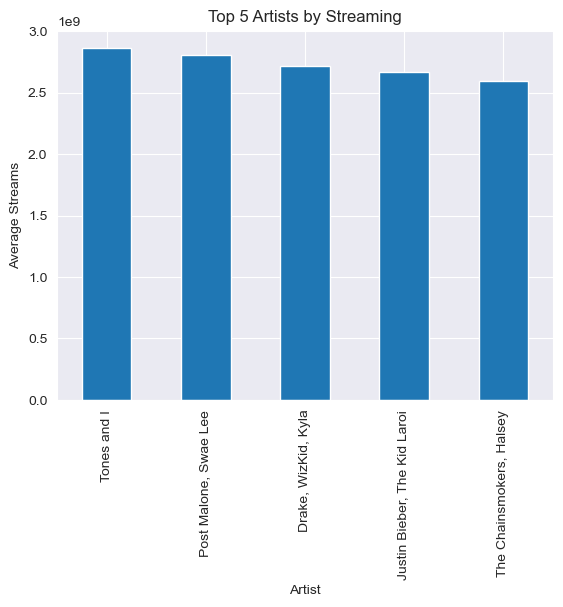

In [16]:

print(df_tracks['streams'].dtype)


# Remove non-numeric values and convert the 'streams' column to numeric
df_tracks['streams'] = pd.to_numeric(df_tracks['streams'], errors='coerce')

# Check the data types again
print(df_tracks['streams'].dtype)

# Now, you can calculate the mean of the 'streams' column
top_five_artists = df_tracks.groupby('artist(s)_name')['streams'].mean().nlargest(5)

# Plot the bar chart
top_five_artists.plot(kind='bar')
plt.title("Top 5 Artists by Streaming")
plt.xlabel("Artist")
plt.ylabel("Average Streams")
plt.show()


### Top 5 dance tracks 

In [17]:
top_five_dance_tracks = df_tracks[["danceability_%", "track_name"]].sort_values(by="danceability_%", ascending = False).head(5)
top_five_dance_tracks

,danceability_%,track_name
595,96,Peru
224,95,Players
250,95,The Real Slim Shady
423,95,Super Freaky Girl
702,95,Starlight


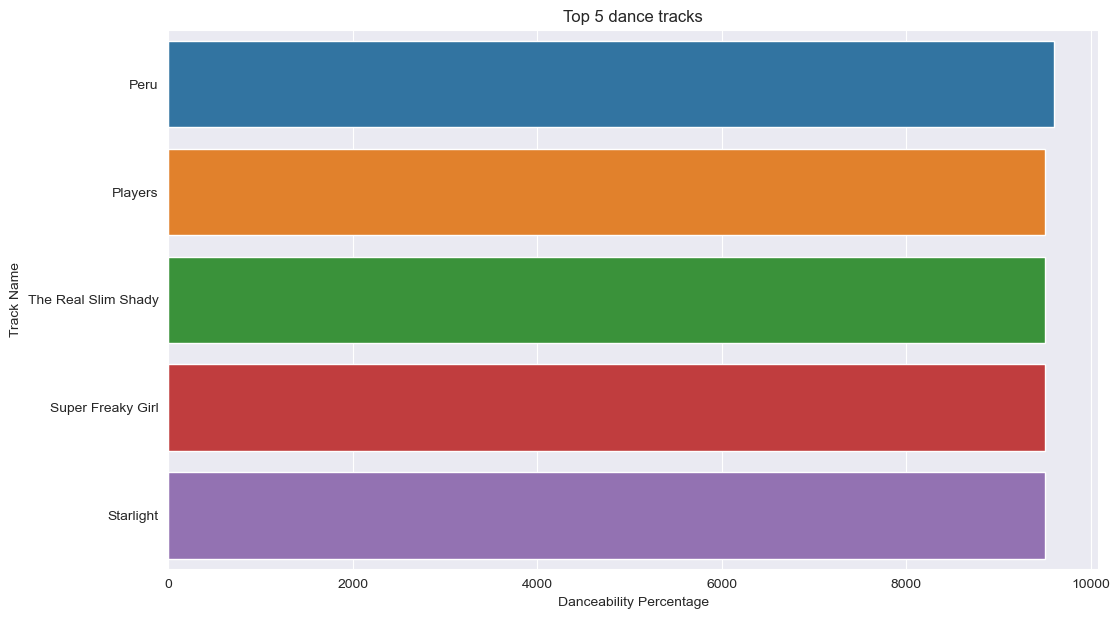

In [18]:
top_five_dance_tracks['danceability_%'] = top_five_dance_tracks['danceability_%'] * 100

plt.figure(figsize=(12,7))
sns.barplot(x="danceability_%", y = "track_name", data= top_five_dance_tracks)
plt.title('Top 5 Dance Tracks')
plt.xlabel('Danceability Percentage')
plt.ylabel('Track Name')
plt.title("Top 5 dance tracks")
plt.show()

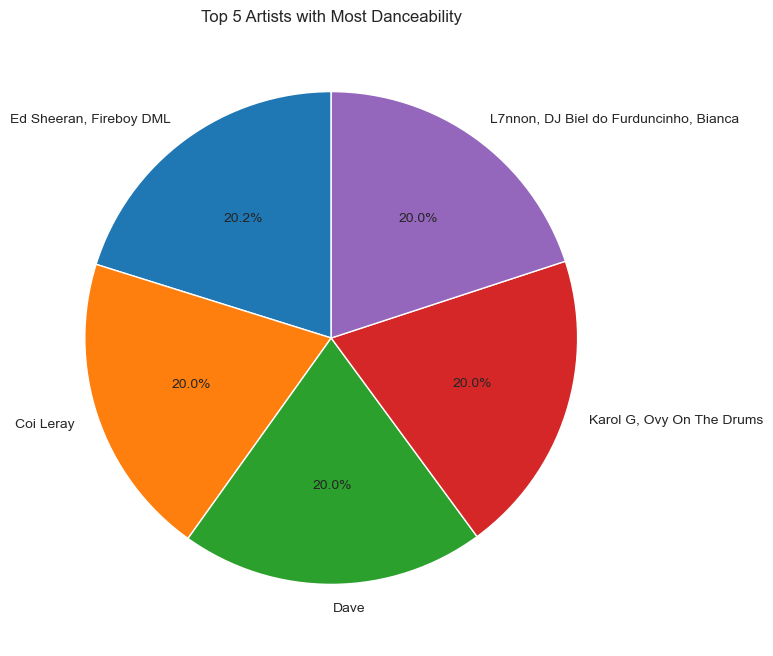

In [19]:
average_danceability = df_tracks.groupby('artist(s)_name')['danceability_%'].mean()

top_five_artist_danceability = average_danceability.nlargest(5)

plt.figure(figsize = (8,8))

plt.pie(top_five_artist_danceability, labels=top_five_artist_danceability.index, autopct='%1.1f%%', startangle=90)

plt.title('Top 5 Artists with Most Danceability')
plt.show()

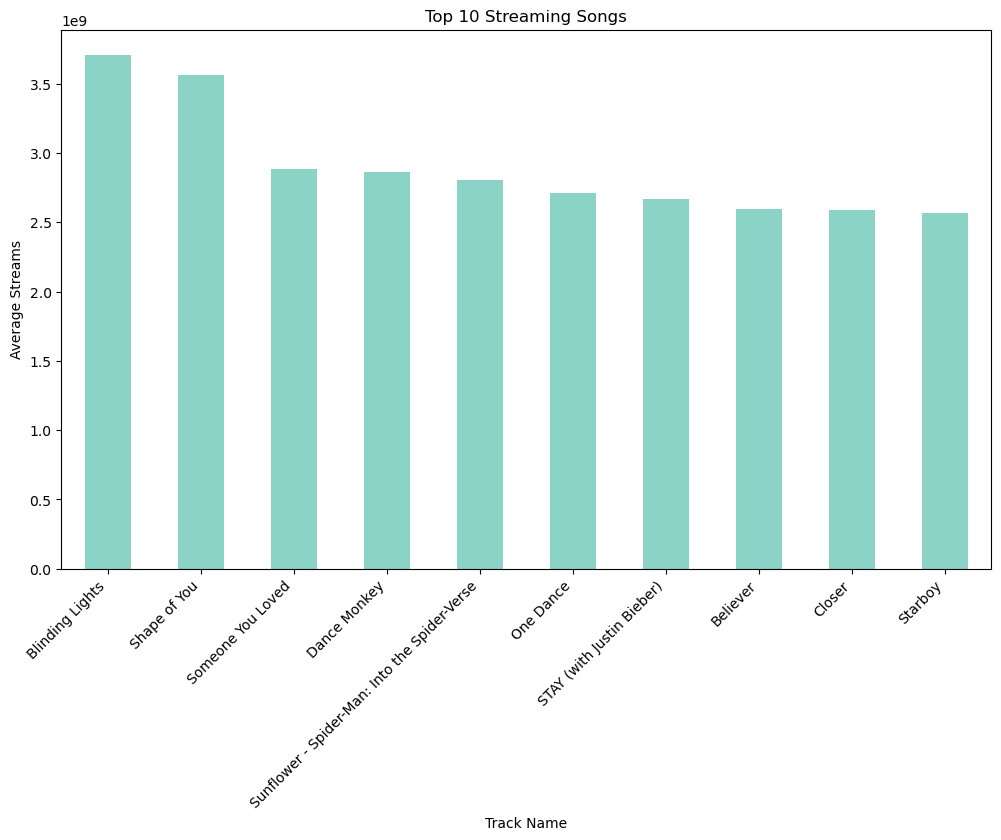

In [35]:
average_streams = df_tracks.groupby('track_name')['streams'].mean()

top_10_streaming_songs = average_streams.nlargest(10)

plt.figure(figsize = (12,7))

top_10_streaming_songs.plot(kind = 'bar', color = "#8bd3c7")

plt.title('Top 10 Streaming Songs')
plt.xlabel('Track Name')
plt.ylabel('Average Streams')

plt.xticks(rotation = 45, ha = 'right')
plt.show()

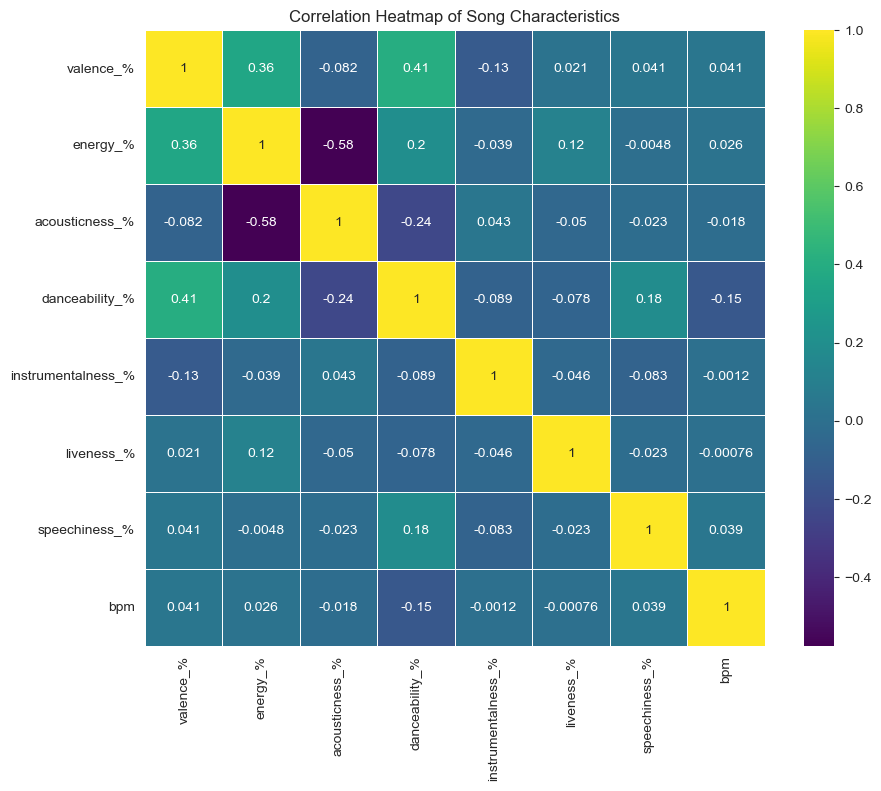

In [47]:
# Select the relevant columns for the heatmap
features = df_tracks[['valence_%', 'energy_%', 'acousticness_%', 'danceability_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']]

# Compute the correlation matrix
correlation_matrix = features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap of Song Characteristics')
plt.show()

### Seasonal Hits

In [48]:
df_tracks['season_released'] = df_tracks['released_month'].apply(lambda x: 'Spring' if x in [3, 4, 5] else
                                       'Summer' if x in [6, 7, 8] else
                                       'Autumn' if x in [9, 10, 11] else
                                       'Winter')

In [50]:
season_counts = df_tracks['season_released'].value_counts()

In [51]:
print(season_counts.head(10))

season_released
Spring    280
Winter    270
Autumn    209
Summer    194
Name: count, dtype: int64


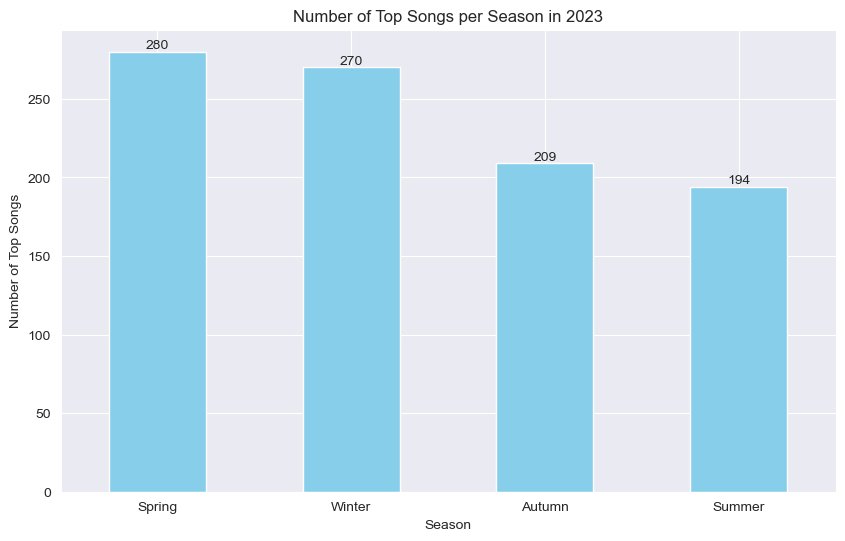

In [52]:
# Create a bar graph with annotations
plt.figure(figsize=(10, 6))
ax = season_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Number of Top Songs')
plt.title('Number of Top Songs per Season in 2023')
plt.xticks(rotation=0)

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

### Decision Tree

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [39]:
df_tracks['streams'] = pd.to_numeric(df_tracks['streams'], errors='coerce')

In [40]:
median_streams = df_tracks['streams'].median()
df_tracks['high_stream'] = (df_tracks['streams'] > median_streams).astype(int)

In [41]:
df_tracks['mode_encoded'] = df_tracks['mode'].map({'Major': 1, 'Minor': 0}).astype(int)
label_encoder = LabelEncoder()
df_tracks['key_encoded'] = label_encoder.fit_transform(df_tracks['key'])

In [42]:
features = ['artist_count', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'mode_encoded', 'key_encoded']
X = df_tracks[features]
y = df_tracks['high_stream']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = DecisionTreeClassifier(max_depth=50, min_samples_split=80, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, min_samples_split=80, random_state=42)

In [13]:
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5654


In [14]:
importances = model.feature_importances_

# Print the feature importances
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

artist_count: 0.1159
danceability_%: 0.2618
valence_%: 0.0598
energy_%: 0.1016
acousticness_%: 0.1507
instrumentalness_%: 0.0000
liveness_%: 0.0531
speechiness_%: 0.1598
mode_encoded: 0.0000
key_encoded: 0.0972


We see that danceability plays the most crucial role in a song for high streaming though the model accuracy is 0.56

## Cross Validation 

In [15]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.51 (+/- 0.09)


## Random Forest Classification 

In [59]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=20, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [60]:
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5812


In [61]:
importances = model_rf.feature_importances_

# Print the feature importances
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

artist_count: 0.0480
danceability_%: 0.1470
valence_%: 0.1418
energy_%: 0.1394
acousticness_%: 0.1382
instrumentalness_%: 0.0208
liveness_%: 0.1258
speechiness_%: 0.1129
mode_encoded: 0.0240
key_encoded: 0.1021


This is the highest accuracy(0.58) which is by random forest model. Though Danceability is the main factor for high streaming song

## Gradient Boosting

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
gb_classifier = GradientBoostingClassifier()

# Fitting the model on the training data
gb_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = gb_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5445026178010471


## SVM Classifiaction 

In [19]:
from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
y_pred = model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5445


### Naive Bayes Gaussian Classification

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
model_gaussian = GaussianNB()
model_gaussian.fit(X_train_scaled, y_train)

GaussianNB()

In [48]:
predictions = model_gaussian.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.5235602094240838
              precision    recall  f1-score   support

           0       0.54      0.36      0.43        96
           1       0.52      0.68      0.59        95

    accuracy                           0.52       191
   macro avg       0.53      0.52      0.51       191
weighted avg       0.53      0.52      0.51       191



### To know which model is the best by applying gridsearchcv and hyper parameter tuning

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Example preprocessing step; adjust as needed
    ('classifier', DecisionTreeClassifier())  # Placeholder; will be overridden by GridSearchCV
])

param_grid = [
    {'classifier': [DecisionTreeClassifier()],
     'classifier__max_depth': [None, 10, 20, 30],
     'classifier__min_samples_split': [2, 5, 10]},
    {'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': [20, 50, 100],
     'classifier__max_depth': [None, 10, 20, 30]},
    {'classifier': [MultinomialNB()],
     'classifier__alpha': [0.5, 1.0, 1.5]},
    {'classifier': [BernoulliNB()],
     'classifier__alpha': [0.5, 1.0, 1.5]},
    {'classifier': [GaussianNB()]},
    {'classifier': [SVC()],
     'classifier__C': [1, 10, 20],
     'classifier__kernel': ['linear', 'rbf'],
     'classifier__gamma': ['scale', 'auto']},
    {'classifier': [LogisticRegression(max_iter=1000)],
     'classifier__penalty': ['l1', 'l2'],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

In [69]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 55 candidates, totalling 275 fits
Best parameters: {'classifier': LogisticRegression(C=1, max_iter=1000), 'classifier__C': 1, 'classifier__penalty': 'l2'}
Best cross-validation score: 0.5629428964568283


C:\Users\ANIRBAN GUHA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 275.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ANIRBAN GUHA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ANIRBAN GUHA\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ANIRBAN GUHA\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit


In [70]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy on Test Set: 0.5549738219895288
              precision    recall  f1-score   support

           0       0.57      0.49      0.53        96
           1       0.55      0.62      0.58        95

    accuracy                           0.55       191
   macro avg       0.56      0.56      0.55       191
weighted avg       0.56      0.55      0.55       191



In [76]:
from sklearn.metrics import accuracy_score

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Bernoulli Naive Bayes', BernoulliNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC())
]

# Iterate through each model
for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Print accuracy score
    print(f"Accuracy for {name}: {accuracy}")


C:\Users\ANIRBAN GUHA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Logistic Regression: 0.5602094240837696
Accuracy for Random Forest: 0.5863874345549738
Accuracy for Naive Bayes: 0.5235602094240838
Accuracy for Multinomial Naive Bayes: 0.43455497382198954
Accuracy for Bernoulli Naive Bayes: 0.4869109947643979
Accuracy for Decision Tree: 0.4816753926701571
Accuracy for Support Vector Machine: 0.5130890052356021


In [77]:
# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get feature importance (coefficients)
feature_importance_logreg = pd.DataFrame(data=logreg.coef_[0], index=X_train.columns, columns=['Importance'])
feature_importance_logreg.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importance (Logistic Regression):")
print(feature_importance_logreg)

Feature Importance (Logistic Regression):
                    Importance
mode_encoded          0.069761
valence_%             0.002996
instrumentalness_%    0.000951
key_encoded           0.000153
danceability_%       -0.003563
acousticness_%       -0.007635
energy_%             -0.012461
liveness_%           -0.014009
speechiness_%        -0.026638
artist_count         -0.261386


C:\Users\ANIRBAN GUHA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
# Fit the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importance
feature_importance_rf = pd.DataFrame(data=rf.feature_importances_, index=X_train.columns, columns=['Importance'])
feature_importance_rf.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importance (Random Forest):")
print(feature_importance_rf)

Feature Importance (Random Forest):
                    Importance
valence_%             0.151533
energy_%              0.147471
danceability_%        0.140888
acousticness_%        0.136289
liveness_%            0.125473
speechiness_%         0.116098
key_encoded           0.094140
artist_count          0.042590
mode_encoded          0.024949
instrumentalness_%    0.020568


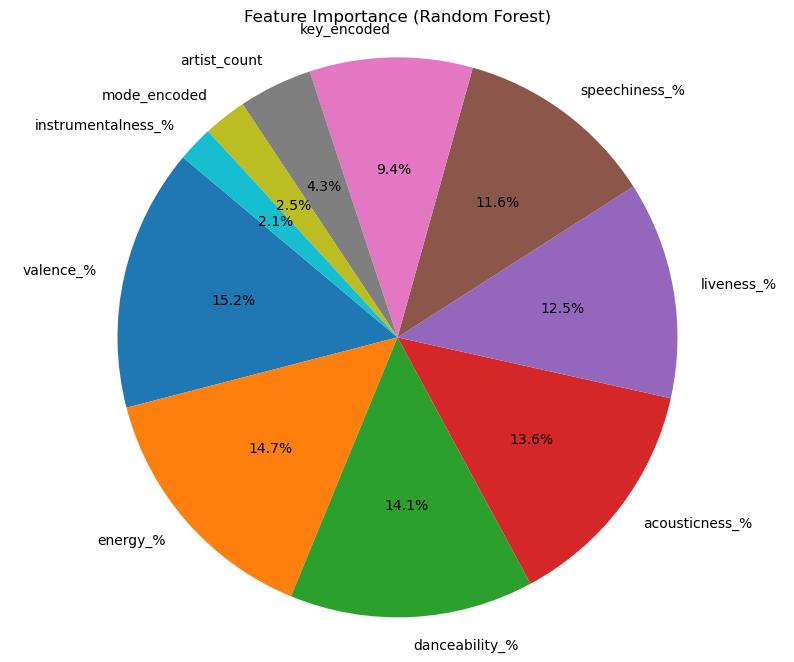

In [79]:
import matplotlib.pyplot as plt

# Get feature names and importances
feature_names = feature_importance_rf.index
feature_importances = feature_importance_rf['Importance']

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(feature_importances, labels=feature_names, autopct='%1.1f%%', startangle=140)
plt.title('Feature Importance (Random Forest)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## L1 Regularization

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
# Assuming `X` is your features and `y` is your target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
lasso = Lasso(alpha=50, max_iter=100, tol=0.1)  # alpha is the regularization strength
lasso.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [34]:
print("Training score:", lasso.score(X_train, y_train))
print("Test score:", lasso.score(X_test, y_test))

Training score: 0.0
Test score: -2.741228070157753e-05


## L2 Regularization

In [35]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [37]:
ridge_reg.score(X_test, y_test)

-0.00434528435767767

In [38]:
ridge_reg.score(X_train, y_train)

0.048797565278353106

### Platform comparison between spotfy and apple 

In [6]:
import pandas as pd

# Assuming df_tracks is your DataFrame containing the dataset

# Filter Spotify playlists
spotify_streams = df_tracks['in_spotify_playlists'].sum()

# Filter Apple playlists
apple_streams = df_tracks['in_apple_playlists'].sum()

In [9]:
platform_comparison = pd.DataFrame({
    'Platform': ['Spotify', 'Apple'],
    'Total_Streams': [spotify_streams, apple_streams]
})

platform_comparison.head()

,Platform,Total_Streams
0,Spotify,4955719
1,Apple,64625


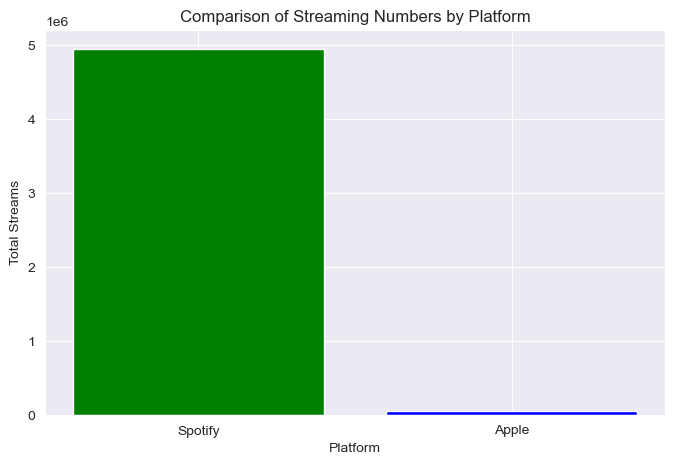

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(platform_comparison['Platform'], platform_comparison['Total_Streams'], color=['green', 'blue'])
plt.title('Comparison of Streaming Numbers by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Streams')
plt.show()

### Time series forecasting

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
streaming_data = df_tracks.groupby('released_month')['streams'].sum()

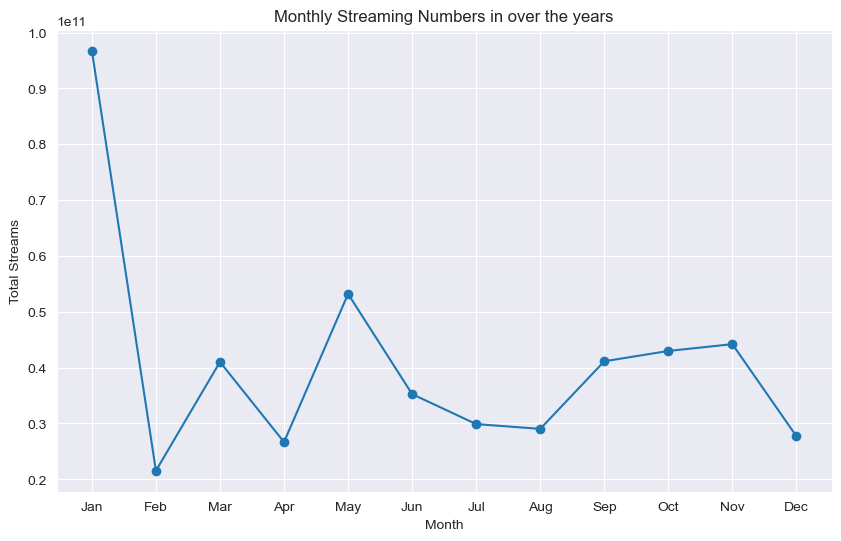

In [44]:
plt.figure(figsize=(10, 6))
streaming_data.plot(marker='o')
plt.title('Monthly Streaming Numbers in over the years')
plt.xlabel('Month')
plt.ylabel('Total Streams')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

## Sentiment Analysis

In [3]:
from textblob import TextBlob

In [4]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Return the polarity score (-1 to 1)
    return analysis.sentiment.polarity


In [10]:
# Analyze sentiment for track names
df_tracks['track_name_sentiment'] = df_tracks['track_name'].apply(analyze_sentiment)

In [11]:
# Analyze sentiment for artist names
df_tracks['artist_name_sentiment'] = df_tracks['artist(s)_name'].apply(analyze_sentiment)


In [12]:
print(df_tracks[['track_name', 'track_name_sentiment']].head())
print(df_tracks[['artist(s)_name', 'artist_name_sentiment']].head())

                            track_name  track_name_sentiment
0  Seven (feat. Latto) (Explicit Ver.)                   0.0
1                                 LALA                   0.0
2                              vampire                   0.0
3                         Cruel Summer                  -1.0
4                       WHERE SHE GOES                   0.0
     artist(s)_name  artist_name_sentiment
0  Latto, Jung Kook                    0.0
1       Myke Towers                    0.0
2    Olivia Rodrigo                    0.0
3      Taylor Swift                    0.0
4         Bad Bunny                   -0.7


In [29]:
# Convert the streams column to numeric, coercing errors to NaN
df_tracks['streams'] = pd.to_numeric(df_tracks['streams'], errors='coerce')

# Calculate the mean of the streams column
mean_streams = df_tracks['streams'].mean()

# Replace NaN values with the mean
df_tracks['streams'].fillna(mean_streams, inplace=True)
df_tracks.head(575)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,1.413817e+08,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,1.337163e+08,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,1.400040e+08,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,8.008408e+08,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,3.032363e+08,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Volando - Remix,"Sech, Bad Bunny, Mora",3,2021,7,8,3272,19,6.100456e+08,101,...,154,F#,Major,66,63,69,21,0,11,7
571,Leave The Door Open,"Bruno Mars, Anderson .Paak, Silk Sonic",3,2021,3,5,14417,0,1.115881e+09,237,...,148,F,Major,59,72,62,18,0,9,3
572,Knife Talk (with 21 Savage ft. Project Pat),"Drake, Project Pat, 21 Savage",3,2021,9,3,5199,0,5.944830e+08,45,...,146,F,Minor,85,22,37,13,0,7,30
573,Don't Be Shy,"Tiï¿½ï¿½sto, Kar",2,2021,8,1,6026,0,5.669547e+08,171,...,120,B,Minor,77,51,79,20,0,26,6


## Artist Influence on streaming number

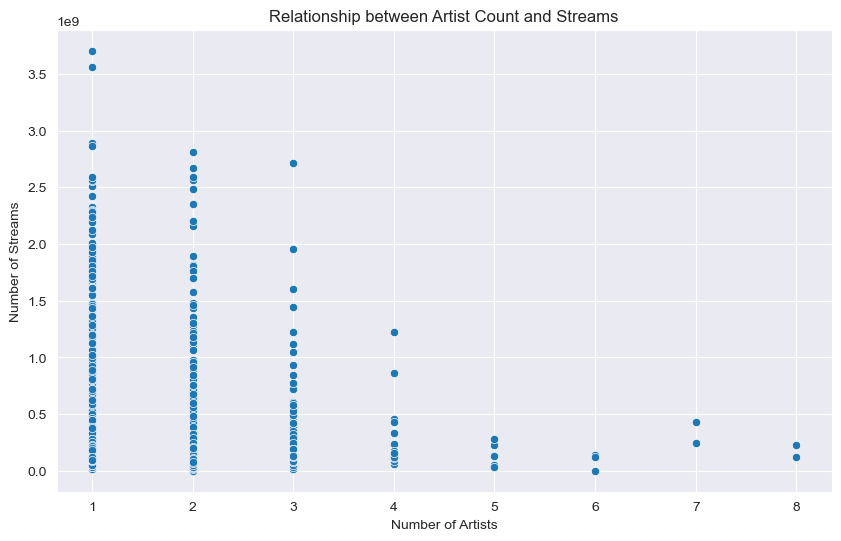

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Drop the 575th row of the streams column


# Assuming df_tracks is your DataFrame containing the dataset

# Plotting the relationship between artist_count and streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='artist_count', y='streams', data=df_tracks)
plt.title('Relationship between Artist Count and Streams')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Streams')
plt.show()

In [35]:
# Grouping the data by artist name and aggregating the streaming numbers
artist_streams = df_tracks.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False)

# Displaying the top 10 artists by total streaming numbers
for artist, streams in artist_streams.head(10).items():
    print(f"{artist}: {streams}")

The Weeknd: 14185552870.0
Taylor Swift: 14053658300.0
Ed Sheeran: 13908947204.0
Harry Styles: 11608645649.0
Bad Bunny: 9997799607.0
Olivia Rodrigo: 7442148916.0
Eminem: 6183805596.0
Bruno Mars: 5846920599.0
Arctic Monkeys: 5569806731.0
Imagine Dragons: 5272484650.0
